In [3]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('winequality-red.csv',sep=';')

print(len(df.columns))
df.head()

12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(160, 11) fixed acidity            8.239375
volatile acidity         0.513281
citric acid              0.269812
residual sugar           2.557500
chlorides                0.086425
free sulfur dioxide     14.981250
total sulfur dioxide    42.506250
density                  0.996653
pH                       3.318500
sulphates                0.652063
alcohol                 10.481250
dtype: float64


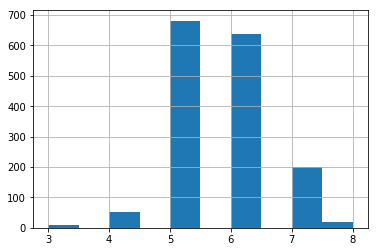

In [7]:
df['quality'] = df['quality'].astype(int)
df['quality'].hist()

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

print(X_test.shape,X_test.mean())

[0.03279718 0.16212684 0.01720764 0.03965912 0.03606932 0.01562006
 0.07127238 0.03328242 0.03568697 0.16817872 0.38809936]


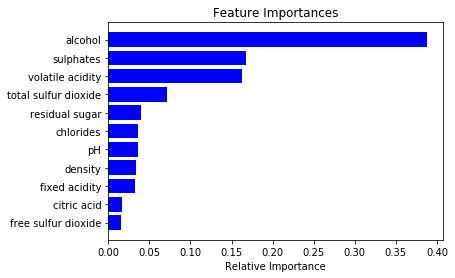

In [13]:
#################
# Random Forest #
#################

rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [14]:
################
#   The SHAP   #
################

import shap
shap.initjs()
rf_explainer = shap.KernelExplainer(rf.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
 26%|██▌       | 41/160 [00:48<02:33,  1.29s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 52%|█████▎    | 84/160 [01:41<01:30,  1.20s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 79%|███████▉  | 127/160 [02:32<00:39,  1.20s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


100%|██████████| 160/160 [03:13<00:00,  1.21s/it]


In [18]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [19]:
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)

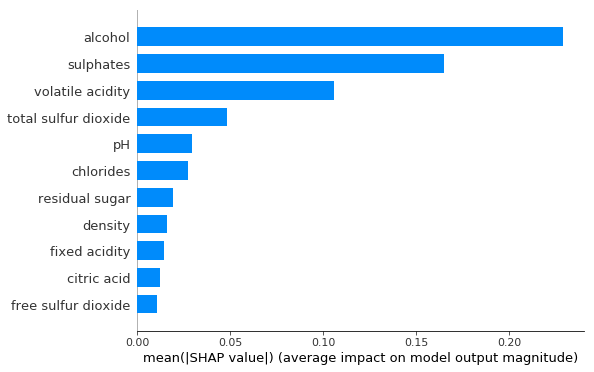

In [20]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

Feature importance: Variables are ranked in descending order.

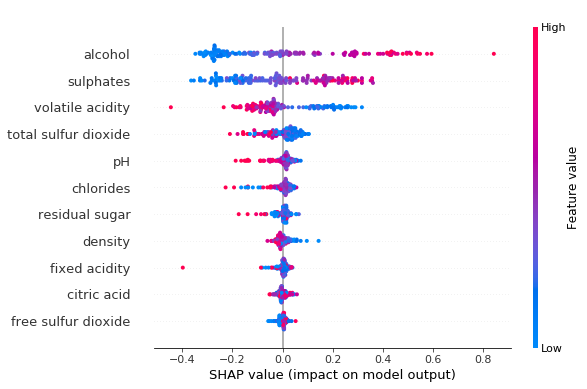

In [21]:
shap.summary_plot(rf_shap_values, X_test)



Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

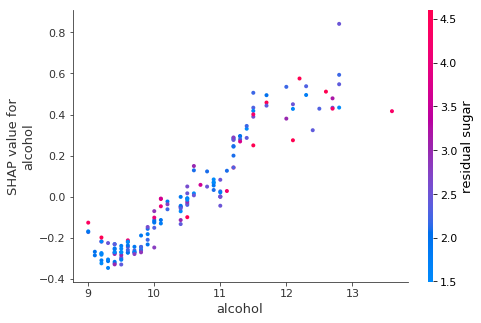

In [22]:
shap.dependence_plot("alcohol", rf_shap_values, X_test)

Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will say “volatile acidity” is negatively correlated with the target variable.

In [23]:
##############
#    GBM     #
##############

from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, Y_train)

gbm_explainer = shap.KernelExplainer(gbm.predict, X_test)
gbm_shap_values = gbm_explainer.shap_values(X_test)


Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
 26%|██▌       | 41/160 [07:40<22:22, 11.28s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 52%|█████▎    | 84/160 [15:16<12:59, 10.26s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 79%|███████▉  | 127/160 [24:13<07:17, 13.25s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


100%|██████████| 160/160 [31:20<00:00, 11.75s/it]


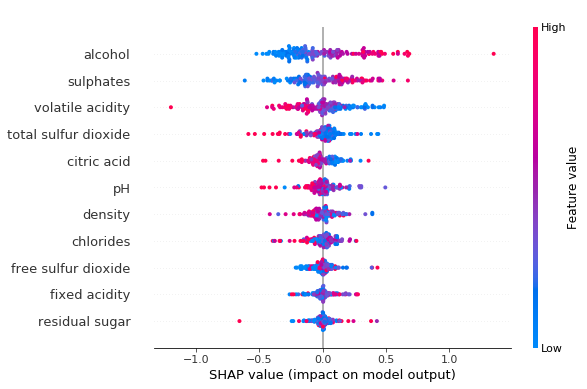

In [24]:
shap.summary_plot(gbm_shap_values, X_test)

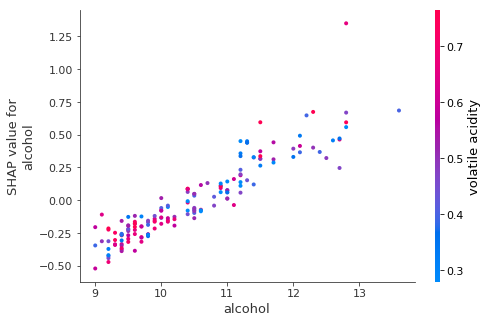

In [25]:
shap.dependence_plot("alcohol", gbm_shap_values, X_test)

In [26]:
# plot the SHAP values for the 10th observation 
shap.force_plot(gbm_explainer.expected_value,gbm_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [27]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

In [28]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

In [30]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(gbm_explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

TypeError: 'float' object is not subscriptable

In [31]:
##############
#    XGB     #
##############

from xgboost import XGBClassifier
n_estimators = 500
xgb = ensemble.XGBClassifier(
            n_estimators=n_estimators,
            random_state=0)
xgb.fit(X_train, Y_train)

xgb_explainer = shap.KernelExplainer(rf.predict, X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

shap.dependence_plot("alcohol", xgb_shap_values, X_test)

shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

AttributeError: module 'sklearn.ensemble' has no attribute 'XGBClassifier'

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
 26%|██▌       | 41/160 [02:14<06:38,  3.35s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 52%|█████▎    | 84/160 [04:30<04:05,  3.23s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 79%|███████▉  | 127/160 [06:46<01:34,  2.88s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


100%|██████████| 160/160 [08:27<00:00,  3.17s/it]


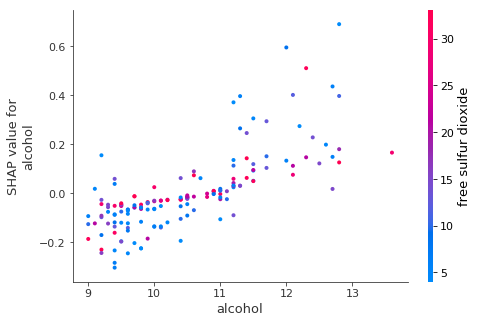

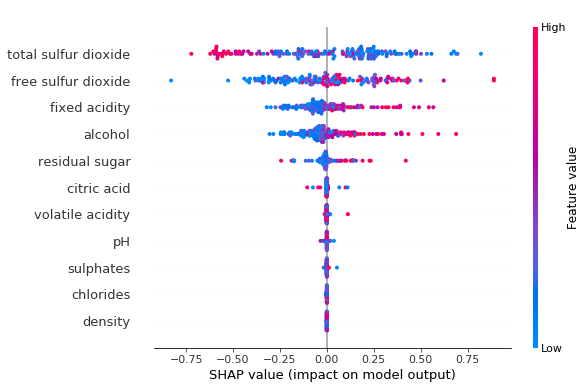

In [32]:
##############
#    KNN     #
##############

from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train, Y_train)

knn_explainer = shap.KernelExplainer(knn.predict, X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

shap.dependence_plot("alcohol", knn_shap_values, X_test)

# plot the SHAP values for the 10th observation 


In [34]:
shap.force_plot(knn_explainer.expected_value,knn_shap_values[10,:], X_test.iloc[10,:]) 

In [35]:
shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)

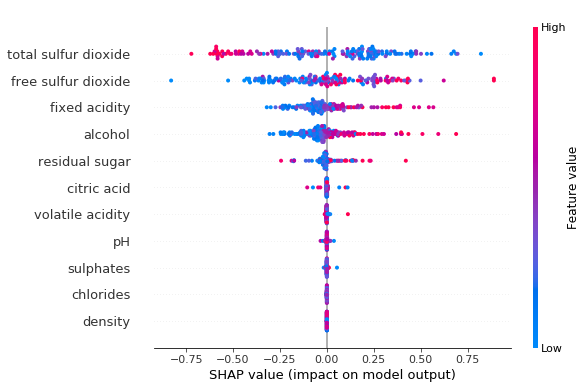

In [36]:
shap.summary_plot(knn_shap_values, X_test)

In [37]:
##############
#    SVM     #
##############

from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train, Y_train)  

svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
 26%|██▌       | 41/160 [07:41<22:14, 11.22s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 52%|█████▎    | 84/160 [16:25<15:34, 12.29s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


 79%|███████▉  | 127/160 [25:14<06:44, 12.26s/it]l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


100%|██████████| 160/160 [32:02<00:00, 12.02s/it]


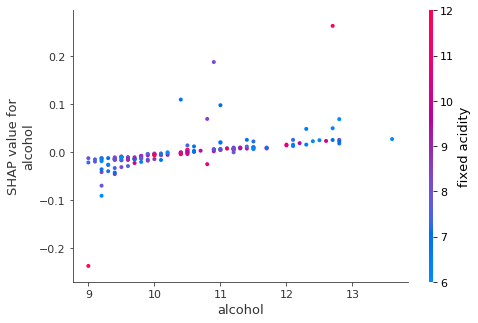

In [38]:
shap.dependence_plot("alcohol", svm_shap_values, X_test)

In [39]:
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 

In [40]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

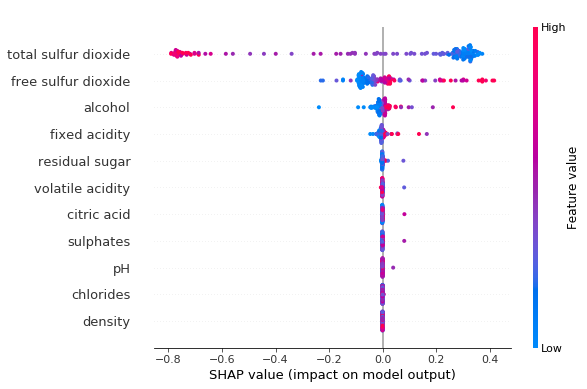

In [41]:
shap.summary_plot(svm_shap_values, X_test)

In [ ]:
##############
#    H2O     #
##############

import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init()

X_train, X_test = train_test_split(df, test_size = 0.1)

X_train_hex = h2o.H2OFrame(X_train)
X_test_hex = h2o.H2OFrame(X_test)

X_names =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Define model
h2o_rf = H2ORandomForestEstimator(ntrees=200, max_depth=20, nfolds=10)

# Train model
h2o_rf.train(x=X_names, y='quality', training_frame=X_train_hex)

X_test = X_test_hex.drop('quality').as_data_frame()

class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

h2o_wrapper = H2OProbWrapper(h2o_rf,X_names)

h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)

h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)
h2o_rf_shap_values = h2o_rf_explainer.shap_values(X_test)

shap.summary_plot(h2o_rf_shap_values, X_test)

shap.dependence_plot("alcohol", h2o_rf_shap_values, X_test)

# plot the SHAP values for the 10th observation 
shap.force_plot(h2o_rf_explainer.expected_value,h2o_rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

shap.force_plot(h2o_rf_explainer.expected_value, h2o_rf_shap_values, X_test)